In [ ]:
# The usual preamble
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

pl.Config.set_tbl_cols(60)
pl.Config.set_fmt_str_lengths(5000)

plt.rcParams['figure.figsize'] = (15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [13]:
# because of mixed types we specify dtype to prevent any errors
complaints = pl.read_csv('./data/311-service-requests.csv', infer_schema_length=0, schema_overrides=[pl.Utf8])

# 2.1 What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

In [15]:
complaints

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.79160395779721)"""
"""26593698""","""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Department""","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""","""1009349""","""201984""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.721040535628305""","""-73.90945306791765""","""(40.721040535628305, -73.90945306791765)"""
"""26594139""","""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Department""","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""","""1001088""","""246531""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.84332975466513""","""-73.93914371913482""","""(40.84332975466513, -73.93914371913482)"""
"""26595721""","""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Department""","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""","""989730""","""222727""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unsp

# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [16]:
complaints['Complaint Type']

Complaint Type
str
"""Noise - Street/Sidewalk"""
"""Illegal Parking"""
"""Noise - Commercial"""
"""Noise - Vehicle"""
"""Rodent"""
…
"""Maintenance or Facility"""
"""Illegal Parking"""
"""Noise - Street/Sidewalk"""


To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [17]:
complaints[:5]

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.79160395779721)"""
"""26593698""","""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Department""","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""","""1009349""","""201984""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.721040535628305""","""-73.90945306791765""","""(40.721040535628305, -73.90945306791765)"""
"""26594139""","""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Department""","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""","""1001088""","""246531""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.84332975466513""","""-73.93914371913482""","""(40.84332975466513, -73.93914371913482)"""
"""26595721""","""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Department""","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""","""989730""","""222727""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unsp

We can combine these to get the first 5 rows of a column:

In [18]:
complaints['Complaint Type'][:5]

Complaint Type
str
"""Noise - Street/Sidewalk"""
"""Illegal Parking"""
"""Noise - Commercial"""
"""Noise - Vehicle"""
"""Rodent"""


and it doesn't matter which direction we do it in:

In [19]:
complaints[:5]['Complaint Type']

Complaint Type
str
"""Noise - Street/Sidewalk"""
"""Illegal Parking"""
"""Noise - Commercial"""
"""Noise - Vehicle"""
"""Rodent"""


# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Polars makes it really easy to select a subset of the columns: just index with list of columns you want.

In [20]:
complaints[['Complaint Type', 'Borough']]

Complaint Type,Borough
str,str
"""Noise - Street/Sidewalk""","""QUEENS"""
"""Illegal Parking""","""QUEENS"""
"""Noise - Commercial""","""MANHATTAN"""
"""Noise - Vehicle""","""MANHATTAN"""
"""Rodent""","""MANHATTAN"""
…,…
"""Maintenance or Facility""","""BROOKLYN"""
"""Illegal Parking""","""QUEENS"""
"""Noise - Street/Sidewalk""","""MANHATTAN"""


That showed us a summary, and then we can look at the first 10 rows:

In [21]:
complaints[['Complaint Type', 'Borough']][:10]

Complaint Type,Borough
str,str
"""Noise - Street/Sidewalk""","""QUEENS"""
"""Illegal Parking""","""QUEENS"""
"""Noise - Commercial""","""MANHATTAN"""
"""Noise - Vehicle""","""MANHATTAN"""
"""Rodent""","""MANHATTAN"""
"""Noise - Commercial""","""QUEENS"""
"""Blocked Driveway""","""QUEENS"""
"""Noise - Commercial""","""QUEENS"""
"""Noise - Commercial""","""MANHATTAN"""


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [27]:
complaints['Complaint Type'].value_counts(sort=True)

Complaint Type,count
str,u32
"""HEATING""",14200
"""GENERAL CONSTRUCTION""",7471
"""Street Light Condition""",7117
"""DOF Literature Request""",5797
"""PLUMBING""",5373
…,…
"""Open Flame Permit""",1
"""DWD""",1
"""Highway Sign - Damaged""",1


If we just wanted the top 10 most common complaints, we can do this:

In [29]:
complaint_counts = complaints['Complaint Type'].value_counts(sort=True)
complaint_counts[:10]

Complaint Type,count
str,u32
"""HEATING""",14200
"""GENERAL CONSTRUCTION""",7471
"""Street Light Condition""",7117
"""DOF Literature Request""",5797
"""PLUMBING""",5373
"""PAINT - PLASTER""",5149
"""Blocked Driveway""",4590
"""NONCONST""",3998
"""Street Condition""",3473


But it gets better! We can plot them!

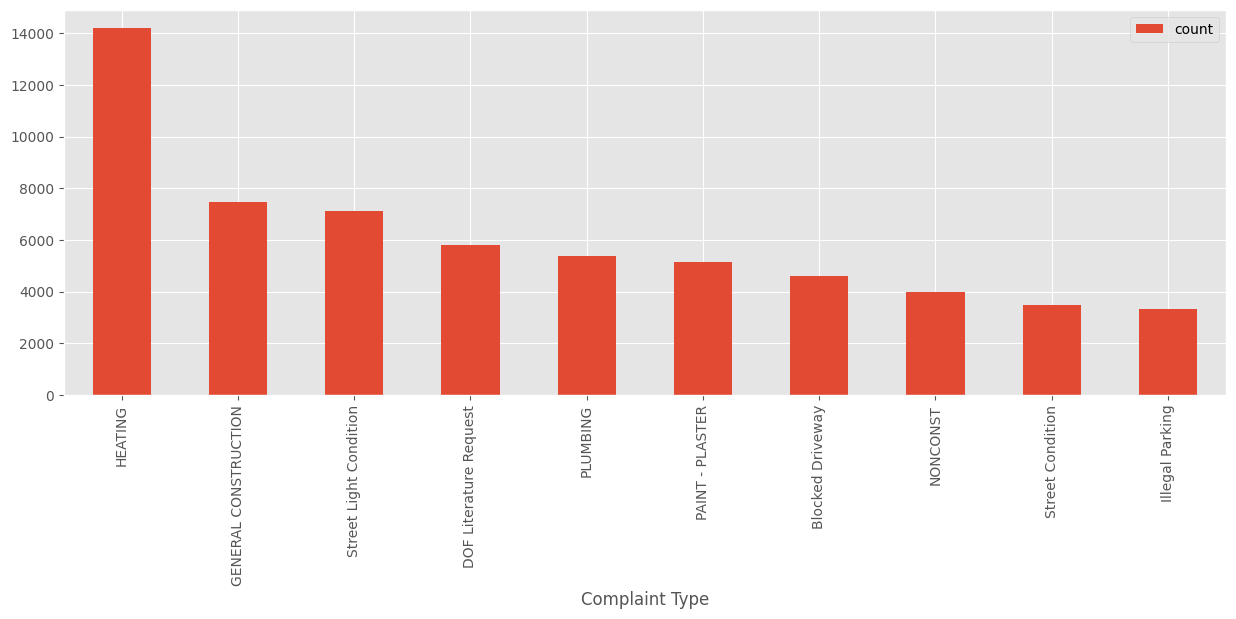

In [39]:
top_10_complaints=complaint_counts[:10].to_pandas()
top_10_complaints.plot(kind='bar', x='Complaint Type')
plt.xlabel('Complaint Type')
plt.show()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  